In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pltio
from scipy.stats import chi2_contingency

In [2]:
# Daily sales data daily sales data
milan_data_df = pd.read_csv("../../datasets/ts_data/daily_aug/aug_milan_cc_arese_data.csv", index_col=[0], parse_dates=True)
daily_augmented = milan_data_df.copy(deep=True)
daily_augmented.head()

,qty,sin_day,cos_day,sincos_day,day_of_week,TMEDIA °C,TMIN °C,TMAX °C,PUNTORUGIADA °C,UMIDITA %,VISIBILITA km,VENTOMEDIA km/h,VENTOMAX km/h,RAFFICA km/h,PRESSIONESLM mb,conditions
time,,,,,,,,,,,,,,,,
2016-04-14,119,0.972118,-0.234491,-0.227953,3,17.0,11.0,24.0,8.0,58.0,10.0,10.0,19.0,0.0,1008.0,-1
2016-04-15,119,0.967938,-0.251190,-0.243136,4,16.0,12.0,20.0,8.0,57.0,10.0,9.0,17.0,0.0,1012.0,1
2016-04-16,206,0.963471,-0.267814,-0.258031,5,17.0,11.0,21.0,7.0,53.0,10.0,7.0,17.0,0.0,1011.0,1
2016-04-17,211,0.958718,-0.284359,-0.272620,6,17.0,14.0,21.0,11.0,65.0,10.0,9.0,19.0,0.0,1010.0,1
2016-04-18,85,0.953681,-0.300820,-0.286886,0,17.0,13.0,23.0,8.0,57.0,10.0,9.0,24.0,33.0,1011.0,-1


In [3]:
# Calc rolling mean with window m
m=15
qty_roll_median = daily_augmented.qty.rolling(window=m).median()
median_first_m = np.median(daily_augmented.iloc[:15, 0])
full_roll_median = qty_roll_median.fillna(median_first_m)

# Add signals for rolling mean and compatibility of phenomena
new_signal_vals = [1 if val > full_roll_median[idx] else -1 for idx, val in enumerate(daily_augmented.qty.values)]
daily_augmented["rolling_medianlbl"] = new_signal_vals

# Calc annual means
daily_augmented["yearly_median"] = np.zeros(daily_augmented.shape[0])
for i in range(2016, 2020):
    median = daily_augmented.loc[str(i)].qty.median()
    daily_augmented.loc[str(i), "yearly_median"] = median
    
# Add a singal of months and calculate monthly means
daily_augmented["month"] = daily_augmented.index.month
monthly_means = daily_augmented.qty.resample("M").median()    
daily_augmented["monthly_median"] = [monthly_means.loc[str(daily_idx.year)+"-"+str(daily_idx.month)].values[0] for daily_idx in daily_augmented.index]

# Yearly mean lbl
daily_augmented["ymedian_lbl"] = [1 if val > daily_augmented["yearly_median"][idx] else -1 for idx, val in enumerate(daily_augmented.qty.values)]

daily_augmented

,qty,sin_day,cos_day,sincos_day,day_of_week,TMEDIA °C,TMIN °C,TMAX °C,PUNTORUGIADA °C,UMIDITA %,...,VENTOMEDIA km/h,VENTOMAX km/h,RAFFICA km/h,PRESSIONESLM mb,conditions,rolling_medianlbl,yearly_median,month,monthly_median,ymedian_lbl
time,,,,,,,,,,,,,,,,,,,,,
2016-04-14,119,9.721182e-01,-0.234491,-2.279533e-01,3,17.0,11.0,24.0,8.0,58.0,...,10.0,19.0,0.0,1008.0,-1,-1,120.0,4,119.0,-1
2016-04-15,119,9.679378e-01,-0.251190,-2.431364e-01,4,16.0,12.0,20.0,8.0,57.0,...,9.0,17.0,0.0,1012.0,1,-1,120.0,4,119.0,-1
2016-04-16,206,9.634705e-01,-0.267814,-2.580312e-01,5,17.0,11.0,21.0,7.0,53.0,...,7.0,17.0,0.0,1011.0,1,1,120.0,4,119.0,1
2016-04-17,211,9.587178e-01,-0.284359,-2.726202e-01,6,17.0,14.0,21.0,11.0,65.0,...,9.0,19.0,0.0,1010.0,1,1,120.0,4,119.0,1
2016-04-18,85,9.536810e-01,-0.300820,-2.868861e-01,0,17.0,13.0,23.0,8.0,57.0,...,9.0,24.0,33.0,1011.0,-1,-1,120.0,4,119.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,194,-6.880243e-02,0.997630,-6.863939e-02,4,3.0,0.0,10.0,2.0,85.0,...,4.0,9.0,0.0,1023.0,1,-1,170.0,12,199.0,1
2019-12-28,228,-5.161967e-02,0.998667,-5.155085e-02,5,3.0,0.0,9.0,2.0,87.0,...,3.0,8.0,0.0,1030.0,1,-1,170.0,12,199.0,1
2019-12-29,233,-3.442161e-02,0.999407,-3.440121e-02,6,2.0,0.0,6.0,3.0,97.0,...,4.0,9.0,0.0,1034.0,1,1,170.0,12,199.0,1


# Scenario 1:  Sales and day of the week

This scenario explores how the day of the week is connected to the amount of sold produts. If we were to take a sample of the data we could actually see the sales quantity is mostly higher on Fridays (day 5) or the weekend. Of course this does not hold when we have seasonal sales, but that will be explored later.

In [4]:
daily_augmented.iloc[180:190, [0,12]]

,qty,VENTOMAX km/h
time,,
2016-10-11,43,15.0
2016-10-12,65,9.0
2016-10-13,50,13.0
2016-10-14,96,28.0
2016-10-15,219,13.0
2016-10-16,208,9.0
2016-10-17,48,7.0
2016-10-18,78,9.0
2016-10-19,90,7.0


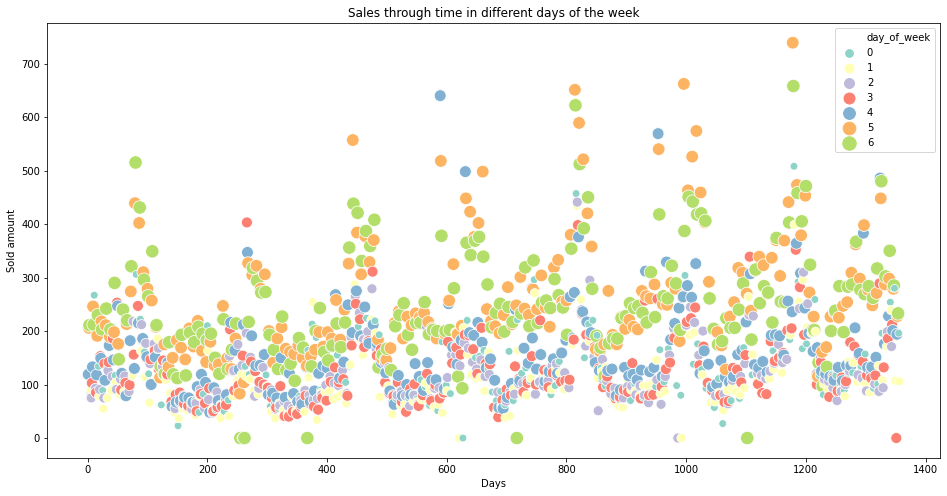

In [18]:
plt.figure(figsize=(16,8))
plt.title("Sales through time in different days of the week")
ax = sns.scatterplot(x=range(0, len(daily_augmented)), y="qty", hue="day_of_week", palette="Set3", size="day_of_week", \
                     sizes=(60, 180), legend="full", data=daily_augmented)
ax.set(xlabel="Days")
ax.set(ylabel="Sold amount")
plt.savefig("sales_days_milan", transparent = True)
plt.show()

In [19]:
dow_ctg_matrix = pd.crosstab(daily_augmented["rolling_medianlbl"], daily_augmented["day_of_week"])
print(dow_ctg_matrix, "\n")
chi2_contingency(dow_ctg_matrix)

day_of_week          0    1    2    3    4    5    6
rolling_medianlbl                                   
-1                 136  158  150  148   92   16   22
 1                  58   36   43   46  102  178  172 



(469.15643174542663,
 3.6916741312385976e-98,
 6,
 array([[103.21886514, 103.21886514, 102.68680914, 103.21886514,
         103.21886514, 103.21886514, 103.21886514],
        [ 90.78113486,  90.78113486,  90.31319086,  90.78113486,
          90.78113486,  90.78113486,  90.78113486]]))

# Scenario 2: Sales and seasonal sales

Most people go shopping and buy more things when there are longer periods of sales for certain holidays, like the Christmas and New Year period or also the two last summer months of July and August. This is something that can be seen by looking at the sales data we have and also an event that will probably keep happening every year. So basically we are trying to check if we can find some data which could show us that in certain parts of the year, people buy more.

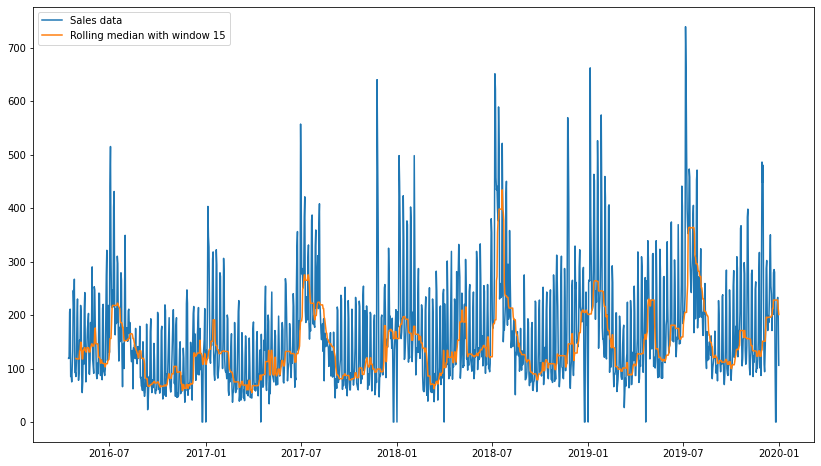

In [7]:
plt.figure(figsize=(14,8))
plt.plot(daily_augmented.qty, label="Sales data")
plt.plot(qty_roll_median, label="Rolling median with window "+str(m)) 
plt.legend()
#plt.savefig("roll_med_15", transparent = True)
plt.show()

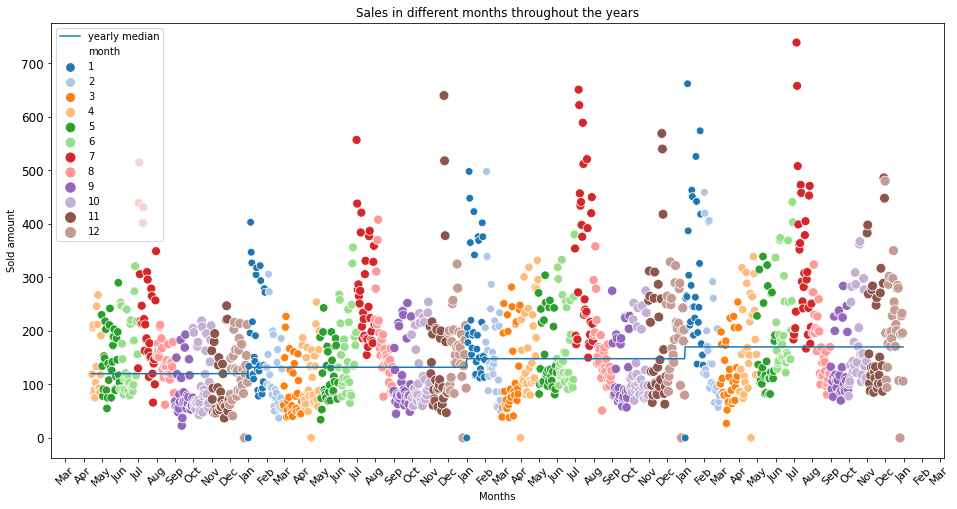

In [32]:
plt.figure(figsize=(16,8))
plt.title("Sales in different months throughout the years")


# Set the locator
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
plt.plot(daily_augmented.index, daily_augmented.yearly_median.values, label="yearly median")
ax = sns.scatterplot(x=daily_augmented.index, y="qty", hue="month", palette="tab20", size="month", sizes=(60, 100),\
                     legend="full", data=daily_augmented)
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
ax.set(xlabel="Months")
ax.set(ylabel="Sold amount")
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=12)
plt.savefig("sales_months_milan", transparent = True)
plt.show()

In [9]:
# Build a contingency table for the sales by months and the annual mean
sc2_ctg_matrix = pd.crosstab(daily_augmented["ymedian_lbl"], daily_augmented["month"])
sc2_ctg_matrix
print(sc2_ctg_matrix)
chi2_contingency(sc2_ctg_matrix)

month        1   2   3   4   5   6    7   8   9   10  11  12
ymedian_lbl                                                 
-1           27  54  66  59  72  60    5  56  89  83  74  40
 1           66  30  27  48  52  60  119  68  31  41  46  84


(214.19170426604572,
 8.364566302587672e-40,
 11,
 array([[46.94546794, 42.40235814, 46.94546794, 54.01252763, 62.59395726,
         60.57479735, 62.59395726, 62.59395726, 60.57479735, 62.59395726,
         60.57479735, 62.59395726],
        [46.05453206, 41.59764186, 46.05453206, 52.98747237, 61.40604274,
         59.42520265, 61.40604274, 61.40604274, 59.42520265, 61.40604274,
         59.42520265, 61.40604274]]))

# Scenario 3: Sales and weather (exogenous variables)

In [10]:
weather_totals = daily_augmented.groupby(pd.Grouper("FENOMENI")).agg({
        "qty": np.mean,
})
weather_totals["counts"] = daily_augmented.FENOMENI.value_counts()
#weather_totals["desc"] = [list(phenomena_dict.keys())[list(phenomena_dict.values()).index(i)] for i in weather_totals.index.values]
weather_totals.columns = ["mean_qty", "counts"]
weather_totals.sort_values(by="mean_qty", ascending=False, inplace=True)

In [11]:
weather_totals

,mean_qty,counts
FENOMENI,,
4.0,273.333333,3
12.0,225.500000,2
10.0,225.000000,7
3.0,214.800000,5
5.0,189.000000,6
8.0,180.366460,161
7.0,173.955224,67
6.0,171.713710,248
1.0,166.875776,644


In [12]:
rainy_classes = [6,7,8]
not_rainy_classes = [1,2] 
mean_rainy = np.mean(daily_augmented[daily_augmented.FENOMENI.isin(rainy_classes)].qty)
mean_not_rainy = np.mean(daily_augmented[daily_augmented.FENOMENI.isin(not_rainy_classes)].qty)
print("Mean sales when the weather is rainy: %.2f" % mean_rainy)
print("Mean sales when the weather is not rainy: %.2f" % mean_not_rainy)

Mean sales when the weather is rainy: 174.96
Mean sales when the weather is not rainy: 162.56
